In [11]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [12]:
from docx import Document

In [13]:
#This notebook analyzes the interviews conducted by the youth members of 846s.org. 
#These interviews talk about the mental health of the youth in Minneapolis 

#importing all necessary modules
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

In [14]:
document = Document("/Users/Avanti/Documents/GitHub/datascienceprojects/DataScienceProjects/wordcloud_interview1_846s/Street interviews transcript.docx")

In [15]:
allText = []
for docpara in document.paragraphs:
    allText.append(docpara.text)

In [39]:
df = pd.DataFrame(allText)
df.columns = ['sentence']
df.set_index('sentence', inplace= True)
df.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True
)

In [43]:
df.head(20)

""
sentence
Street interviews transcript
First woman
""
all right so
what are your thoughts on what's going
on today i know you've been really
a big part of the community here and
then also like how are you taking care
of your mental health during this time


In [41]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df.iterrows(): 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

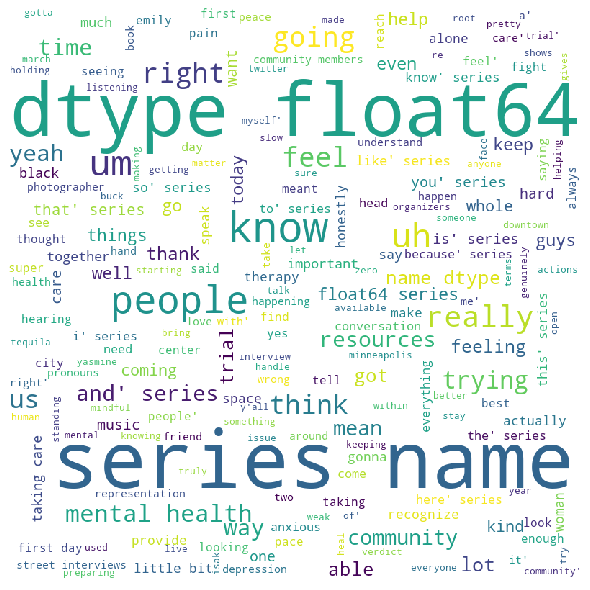

In [42]:
#plot the wordcloud image
plt.figure(figsize =(8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()